# Chapter 1

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.reset()

# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday_name)

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None


array([<matplotlib.axes._subplots.AxesSubplot object at 0x112c8cbe0>,
      dtype=object)

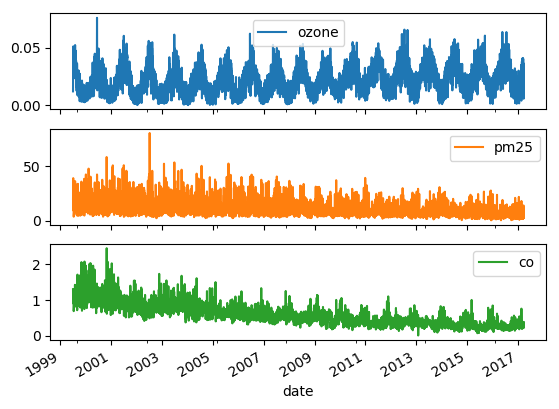

In [9]:
# data prep
data = pd.read_csv('nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data.date)

# Set date column as index
data = data.set_index('date')

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)

            price
date             
2013-01-02  20.08
2013-01-03  19.78
2013-01-04  19.86
2013-01-07  19.40
2013-01-08  19.66
2013-01-09  19.33
2013-01-10  18.99
2013-01-11  19.29
2013-01-14  19.43
2013-01-15  19.52
2013-01-16  20.07
2013-01-17  20.13
2013-01-18  20.02
2013-01-21    NaN
2013-01-22  19.90
2013-01-23  20.11
2013-01-24  20.44
2013-01-25  20.37
2013-01-28  20.31
2013-01-29  19.70
2013-01-30  20.12
2013-01-31  19.63
2013-02-01  19.76
2013-02-04  19.34
2013-02-05  19.66
2013-02-06  19.85
2013-02-07  20.32
2013-02-08  20.50
2013-02-11  20.90
2013-02-12  21.21
...           ...
2015-11-20  33.11
2015-11-23  33.36
2015-11-24  32.96
2015-11-25  33.16
2015-11-26    NaN
2015-11-27  32.94
2015-11-30  33.81
2015-12-01  33.71
2015-12-02  35.65
2015-12-03  34.34
2015-12-04  34.91
2015-12-07  34.68
2015-12-08  34.85
2015-12-09  34.40
2015-12-10  34.63
2015-12-11  32.91
2015-12-14  32.59
2015-12-15  33.03
2015-12-16  33.78
2015-12-17  33.23
2015-12-18  32.95
2015-12-21  32.96
2015-12-22

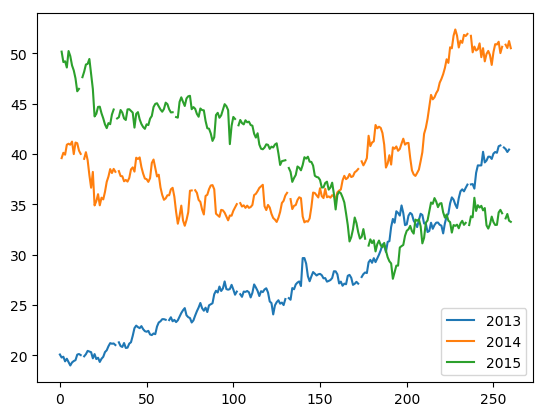

In [12]:
# data prep
yahoo = pd.read_csv('yahoo.csv', index_col=0, parse_dates=[0])
print(yahoo)

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    # we drop the index so that the plot doesn't line it back up as year
    # we use square bracket on ['price'] to force it to return a dataframe,
    # not a 1-D series, which is default for a single column.
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    # we change the column to show it in the graph
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

In [17]:
yahoo.loc['2015', ['price']].reset_index(drop=True)

,price
0,NaN
1,50.17
2,49.13
3,49.21
4,48.59
5,50.23
6,49.72
7,48.80
8,48.30
9,47.51


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


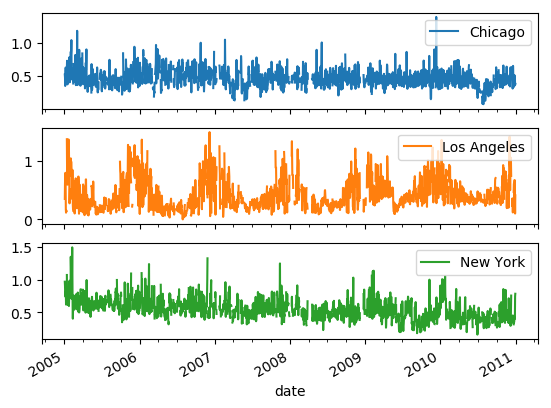

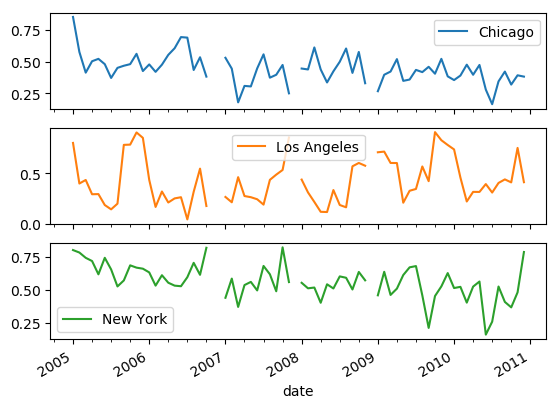

In [18]:
# data prep
co = pd.read_csv('co_cities.csv', index_col=0, parse_dates=[0])

# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()

# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()

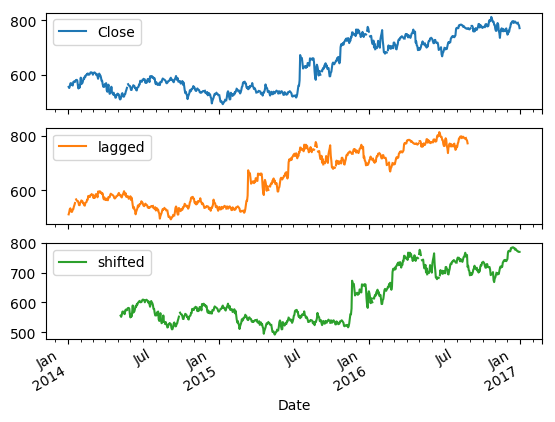

In [22]:
# Import data here
google = pd.read_csv('google.csv', index_col='Date', parse_dates=['Date'])

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(-90)
google['shifted'] = google.Close.shift(90)

# Plot the google price series
google.plot(subplots=True)
plt.show()

In [28]:
# data prep
yahoo = yahoo.asfreq('B')

# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price - yahoo.shifted_30

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1136e80b8>,
      dtype=object)

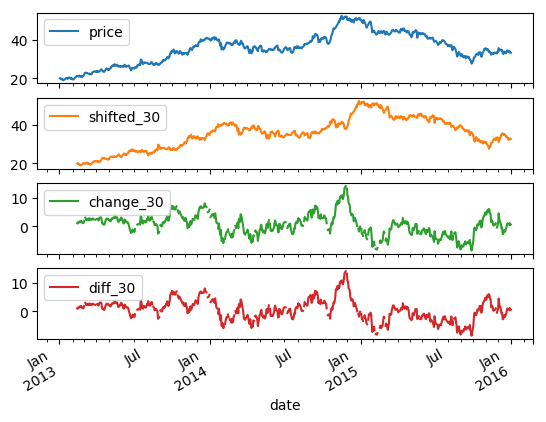

In [27]:
yahoo.plot(subplots=True)

In [29]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 3 columns):
Close      756 non-null float64
lagged     669 non-null float64
shifted    669 non-null float64
dtypes: float64(3)
memory usage: 24.4 KB


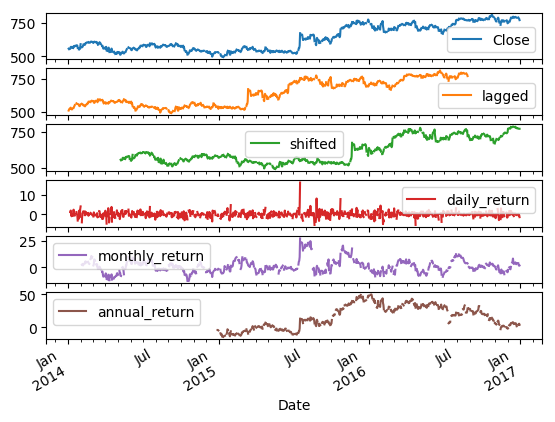

In [32]:
# Data prep
google = google.asfreq('D')

# Create daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()